# Uncertainty and Probability


### Neil D. Lawrence


### Machine Learning and Adaptive Intelligence

# Course Text

<img src="diagrams/a-first-course-in-machine-learning.jpg" height=100% align=center>

@Rogers:book11


# Course Text


![](diagrams/978-0-387-31073-2.png)

@Bishop:book06


# What is Machine Learning?


**<center>data + model = prediction</center>**

 -   **data** : observations, could be actively or passively
    acquired (meta-data).

 -   **model** : assumptions, based on previous experience (other data!
    transfer learning etc), or beliefs about the regularities of
    the universe. Inductive bias.

 -   **prediction** : an action to be taken or a categorization or a
    quality score.


# Fitting Data

- **data**

In [2]:
import numpy as np

# Create some data
x = np.array([1, 3])
y = np.array([3, 1])

- **model**
$$y=mx + c$$

# Model Fitting

$$m = \frac{y_2- y_1}{x_2-x_1}$$
$$ c = y_1 - m x_1 $$

In [3]:
xvals = np.linspace(0, 5, 2);

m = (y[1]-y[0])/(x[1]-x[0]);
c = y[0]-m*x[0];

yvals = m*xvals+c;

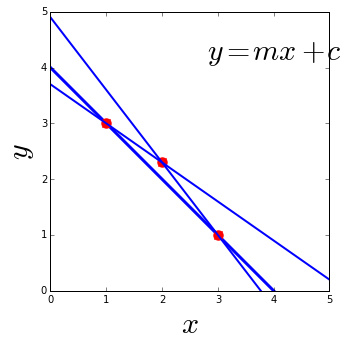

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

xvals = np.linspace(0, 5, 2);

m = (y[1]-y[0])/(x[1]-x[0]);
c = y[0]-m*x[0];

yvals = m*xvals+c;

ylim = np.array([0, 5])
xlim = np.array([0, 5])

f, ax = plt.subplots(1,1,figsize=(5,5))
a = ax.plot(xvals, yvals, '-', linewidth=3);

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.xlabel('$x$', fontsize=30)
plt.ylabel('$y$',fontsize=30)
plt.text(4, 4, '$y=mx+c$',  horizontalalignment='center', verticalalignment='bottom', fontsize=30)
plt.savefig('diagrams/straightLine1.svg')
ctext = ax.text(0.15, c+0.15, '$c$',  horizontalalignment='center', verticalalignment='bottom', fontsize=20)
xl = np.array([1.5, 2.5])
yl = xl*m + c;
mhand = ax.plot([xl[0], xl[1]], [yl.min(), yl.min()], color=[0, 0, 0])
mhand2 = ax.plot([xl.min(), xl.min()], [yl[0], yl[1]], color=[0, 0, 0])
mtext = ax.text(xl.mean(), yl.min()-0.2, '$m$',  horizontalalignment='center', verticalalignment='bottom',fontsize=20);
plt.savefig('diagrams/straightLine2.svg')

a2 = ax.plot(x, y, '.', markersize=20, linewidth=3, color=[1, 0, 0])
plt.savefig('diagrams/straightLine3.svg')

xs = 2
ys = m*xs + c + 0.3

ast = ax.plot(xs, ys, '.', markersize=20, linewidth=3, color=[0, 1, 0])
plt.savefig('diagrams/straightLine4.svg')


m = (y[1]-ys)/(x[1]-xs);
c = ys-m*xs;
yvals = m*xvals+c;

for i in a:
    i.set_visible(False)
for i in mhand:
    i.set_visible(False)
for i in mhand2:
    i.set_visible(False)
mtext.set_visible(False)
ctext.set_visible(False)
a3 = ax.plot(xvals, yvals, '-', linewidth=2, color=[0, 0, 1])
for i in ast:
    i.set_color([1, 0, 0])
plt.savefig('diagrams/straightLine5.svg')

m = (ys-y[0])/(xs-x[0])
c = y[0]-m*x[0]
yvals = m*xvals+c

for i in a3:
    i.set_visible(False)
a4 = ax.plot(xvals, yvals, '-', linewidth=2, color=[0, 0, 1]);
for i in ast:
    i.set_color([1, 0, 0])
plt.savefig('diagrams/straightLine6.svg')
for i in a:
    i.set_visible(True)
for i in a3:
    i.set_visible(True)
plt.savefig('diagrams/straightLine7.svg')


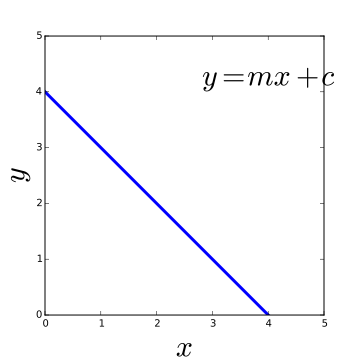

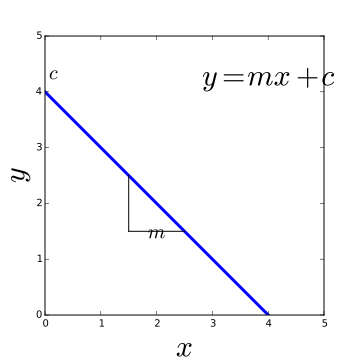

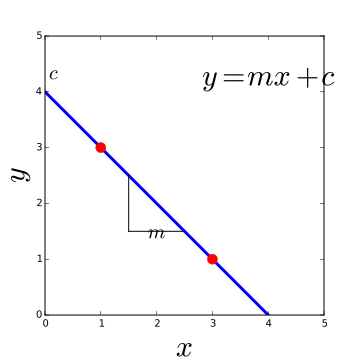

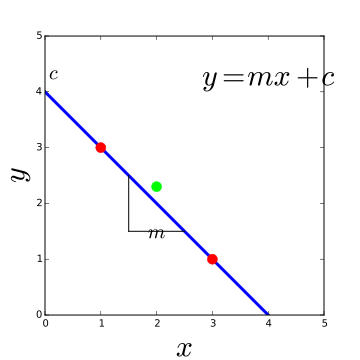

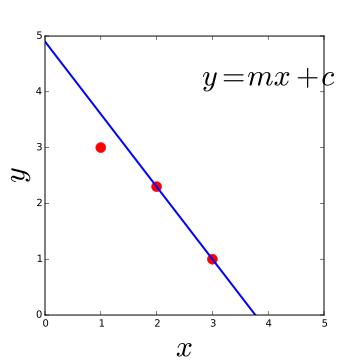

In [10]:
from IPython.display import display, SVG
for i in range(1, 6):
  display(SVG('diagrams/straightLine' + str(i) + '.svg'))


# Data

![](../../../ml/tex/diagrams/straightLine2.svg)

# Data

![](../../../ml/tex/diagrams/straightLine3.svg)

# Data

![](../../../ml/tex/diagrams/straightLine4.svg)

# Data

![](../../../ml/tex/diagrams/straightLine5.svg)

# Data

![](../../../ml/tex/diagrams/straightLine6.svg)

# Data

![](../../../ml/tex/diagrams/straightLine7.svg)

# $y = mx + c$

point 1: $x = 1$, $y=3$ $$3 = m + c$$ 
point 2: $x = 3$, $y=1$ $$1 = 3m + c$$ 
point 3: $x = 2$, $y=2.5$ $$2.5 = 2m + c$$

<img src="../../../ml/tex/diagrams/Pierre-Simon_Laplace.png" align=center width=50%>

<img src="../../../ml/tex/diagrams/laplacesDeterminismFrench.png" align=center width=50%>

<img src="../../../ml/tex/diagrams/laplacesDeterminismEnglish.png" align=center width=50%>

<img src="../../../ml/tex/diagrams/philosophicaless00lapliala.png" height=800>

# $y = mx + c + \epsilon$

point 1: $x = 1$, $y=3$ 
$$3 = m + c + \epsilon_1$$ 

point 2: $x = 3$, $y=1$ 
$$1 = 3m + c + \epsilon_2$$ 

point 3: $x = 2$, $y=2.5$ 
$$2.5 = 2m + c + \epsilon_3$$

### Probability Review

-   We are interested in trials which result in two random variables,
    $X$ and $Y$, each of which has an ‘outcome’
    
    denoted by $x$ or $y$.

-   We summarise the notation and terminology for these distributions in
    the following table.
       
Terminology | Mathematical notation | Description
------|-------------|-------------
joint | $P(X=x, Y=y)$ | prob. that X=x *and* Y=y
marginal | $P(X=x)$ | prob. that X=x *regardless of* Y
conditional | $P(X=x|Y=y)$ | prob. that X=x *given that* Y=y

<center>The different basic probability
  distributions.</center>

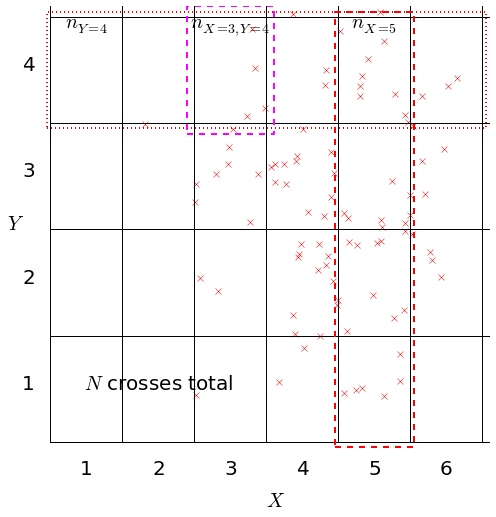

In [134]:
marg = 0.05 # Distance between lines and boxes
indent = 0.1 # indent of n indicators
axis_indent = 0.3 # Axis indent.

x = np.random.randn(100, 1)+4
y = np.random.randn(100, 1)+2.5

fig, ax =plt.subplots(figsize=(8, 8))

# Basic plot set up.    
a = ax.plot(x, y, 'x', color = [1, 0, 0])
plt.axis('off')
ax.set_xlim([0-2*marg, 6+2*marg])
ax.set_ylim([0-2*marg, 4+2*marg])
#ax.set_visible(False)
for i in range(7):
  ax.plot([i, i], [0, 5], color=[0, 0, 0])
for i in range(5):
  ax.plot([0, 7], [i, i], color=[0, 0, 0])

for i in range(1, 5):
  ax.text(-axis_indent, i-.5, str(i), horizontalalignment='center', fontsize=20)

for i in range(1,7):
  ax.text(i-0.5, -axis_indent, str(i), horizontalalignment='center', fontsize=20)

# Box for y=4
ax.plot([-marg, 6+marg, 6+marg, -marg, -marg], [3-marg, 3-marg, 4+marg, 4+marg, 3-marg], linestyle=':', linewidth=2, color=[1, 0, 0])
ax.text(0.5, 4-indent, '$n_{Y=4}$', horizontalalignment='center', fontsize=20)

# Box for x=5
ax.plot([4-marg, 5+marg, 5+marg, 4-marg, 4-marg], [-marg, -marg, 4+marg, 4+marg, -marg], linestyle='--', linewidth=2, color=[1, 0, 0])
ax.text(4.5, 4-indent, '$n_{X=5}$', horizontalalignment='center', fontsize=20)

# Box for x=3, y=4
ax.plot([2-2*marg, 3+2*marg, 3+2*marg, 2-2*marg, 2-2*marg], [3-2*marg, 3-2*marg, 4+2*marg, 4+2*marg, 3-2*marg], linestyle='--', linewidth=2, color=[1, 0, 1])
ax.text(2.5, 4-indent, '$n_{X=3, Y=4}$', horizontalalignment='center', fontsize=20)


plt.text(1.5, 0.5, '$N$ crosses total', horizontalalignment='center', fontsize=20);

plt.text(3, -2*axis_indent, '$X$', fontsize=20)
plt.text(-2*axis_indent, 2, '$Y$', fontsize=20)
#ylabel('\variableTwo')

plt.savefig('../../../ml/tex/diagrams/probDiagram.svg')


# A Pictorial Definition of Probability

![](../../../ml/tex/diagrams/probDiagram.svg)

### Different Distributions

- Definition of probability distributions.

Terminology      |  Definition                                              |         Probability Notation
-----------------|----------------------------------------------------------|------------------------------                                                                                                                               
  Joint Probability      | $\lim_{N\rightarrow\infty}\frac{n_{X=3,Y=4}}{N}$ | $P\left(X=3,Y=4\right)$
  Marginal Probability |  $\lim_{N\rightarrow\infty}\frac{n_{X=5}}{N}$    | $P\left(X=5\right)$
 Conditional Probability | $\lim_{N\rightarrow\infty}\frac{n_{X=3,Y=4}}{n_{Y=4}}$ |  $P\left(X=3|Y=4\right)$

# Notational Details

-   Typically we should write out
    $P\left(X=x,Y=y\right)$.

-   In practice, we often use $P\left(x,y\right)$.

-   This looks very much like we might write a multivariate function,
    *e.g.*
    $f\left(x,y\right)=\frac{x}{y}$.

    -   For a multivariate function though,
        $f\left(x,y\right)\neq f\left(y,x\right)$.

    -   However
        $P\left(x,y\right)=P\left(y,x\right)$
        because
        $P\left(X=x,Y=y\right)=P\left(Y=y,X=x\right)$.

-   We now quickly review the ‘rules of probability’.

# Normalization

*All* distributions are normalized. This is clear from the fact that
$\sum_{x}n_{x}=N$, which gives
$$\sum_{x}P\left(x\right)={\lim_{N\rightarrow\infty}}\frac{\sum_{x}n_{x}}{N}={\lim_{N\rightarrow\infty}}\frac{N}{N}=1.$$
A similar result can be derived for the marginal and conditional
distributions.

# The Sum Rule

Ignoring the limit in our definitions:

-   The marginal probability $P\left(y\right)$ is
    ${\lim_{N\rightarrow\infty}}\frac{n_{y}}{N}$ .

-   The joint distribution $P\left(x,y\right)$ is
    ${\lim_{N\rightarrow\infty}}\frac{n_{x,y}}{N}$.

-   $n_{y}=\sum_{x}n_{x,y}$
    so$${\lim_{N\rightarrow\infty}}\frac{n_{y}}{N}={\lim_{N\rightarrow\infty}}\sum_{x}\frac{n_{x,y}}{N},$$
    in other words
    $$P\left(y\right)=\sum_{x}P\left(x,y\right).$$
    This is known as the sum rule of probability.

# The Product Rule

-   $P\left(x|y\right)$ is
    $${\lim_{N\rightarrow\infty}}\frac{n_{x,y}}{n_{y}}.$$

-   $P\left(x,y\right)$ is
    $${\lim_{N\rightarrow\infty}}\frac{n_{x,y}}{N}={\lim_{N\rightarrow\infty}}\frac{n_{x,y}}{n_{y}}\frac{n_{y}}{N}$$
    or in other
    words$$P\left(x,y\right)=P\left(x|y\right)P\left(y\right).$$
    This is known as the product rule of probability.

# Bayes’ Rule

-   From the product rule,
    $$P\left(y,x\right)=P\left(x,y\right)=P\left(x|y\right)P\left(y\right),$$
    so
    $$P\left(y|x\right)P\left(x\right)=P\left(x|y\right)P\left(y\right)$$
    which leads to Bayes’ rule,
    $$P\left(y|x\right)=\frac{P\left(x|y\right)P\left(y\right)}{P\left(x\right)}.$$

# Bayes’ Theorem Example

-   There are two barrels in front of you. Barrel One contains 20 apples
    and 4 oranges. Barrel Two other contains 4 apples and 8 oranges. You
    choose a barrel randomly and select a fruit. It is an apple. What is
    the probability that the barrel was Barrel One?

# Bayes’ Theorem Example: Answer I

-   We are given that: $$\begin{aligned}
          P(\text{F}=\text{A}|\text{B}=1) = & 20/24 \\
          P(\text{F}=\text{A}|\text{B}=2) = & 4/12 \\
          P(\text{B}=1) = & 0.5 \\
          P(\text{B}=2) = & 0.5
        \end{aligned}$$

# Bayes’ Theorem Example: Answer II

-   We use the sum rule to compute: $$\begin{aligned}
          P(\text{F}=\text{A}) = & P(\text{F}=\text{A}|\text{B}=1)P(\text{B}=1) \\& + P(\text{F}=\text{A}|\text{B}=2)P(\text{B}=2) \\
          = & 20/24\times 0.5 + 4/12 \times 0.5 = 7/12
        \end{aligned}$$

-   And Bayes’ theorem tells us that: $$\begin{aligned}
          P(\text{B}=1|\text{F}=\text{A}) = & \frac{P(\text{F} = \text{A}|\text{B}=1)P(\text{B}=1)}{P(\text{F}=\text{A})}\\ 
          = & \frac{20/24 \times 0.5}{7/12} = 5/7
        \end{aligned}$$



# Reading & Exercises

Before next week, review the example on Bayes Theorem!

-   Read and *understand* Bishop on probability distributions: page
    12–17 (Section 1.2).

-   Complete Exercise 1.3 in Bishop.

# Expectation Computation Example

-   Consider the following distribution.

$y$        |  1  |  2  |  3  |  4
-----------------------------|-----|-----|-----|-----
$P\left(y\right)$ |  0.3|  0.2|  0.1|  0.4

-   What is the mean of the distribution?

-   What is the standard deviation of the distribution?

-   Are the mean and standard deviation representative of the
    distribution form?

-   What is the expected value of $-\log P(y)$?

# Expectations Example: Answer

-   We are given that:

$y$        |   1   |   2   |   3   |   4
---------------------|-------|-------|-------|-------
$P\left(y\right)$ |  0.3  |  0.2  |  0.1  |  0.4
$y^2$       |   1   |   4   |   9   |  16
  $-\log(P(y))$   | 1.204 | 1.609 | 2.302 | 0.916

-   Mean:
    $1\times 0.3 + 2\times 0.2 + 3 \times 0.1 + 4 \times 0.4 = 2.6$

-   Second moment:
    $1 \times 0.3 + 4 \times 0.2 + 9 \times 0.1 + 16 \times 0.4 = 8.4$

-   Variance: $8.4 - 2.6\times 2.6 = 1.64$

-   Standard deviation: $\sqrt{1.64} = 1.2806$

-   Expectation $-\log(P(y))$:
    $0.3\times 1.204 + 0.2\times 1.609 + 0.1\times 2.302 +0.4\times 0.916 = 1.280$

# Sample Based Approximation Example

-   You are given the following values samples of heights of students,

$i$       |   1  |    2 |  3   |   4  |   5  |    6
-----------------|------|------|------|------|------|------
$y_i$ |  1.76|  1.73| 1.79 | 1.81 | 1.85 |  1.80

-   What is the sample mean?

-   What is the sample variance?

-   Can you compute sample approximation expected value of
    $-\log P(y)$?

-   Actually these “data” were sampled from a Gaussian with mean 1.7 and
    standard deviation 0.15. Are your estimates close to the real
    values? If not why not?

# Sample Based Approximation Example: Answer

-   We can compute:

$i$        |    1    |    2    |    3    |    4    |    5    |    6
-------------------|--------|--------|--------|--------|--------|--------
$y_i$  |   1.76  |   1.73  |   1.79  |   1.81  |   1.85  |   1.80
$y^2_i$ |  3.0976 |  2.9929 |  3.2041 |  3.2761 |  3.4225 |  3.2400

-   Mean: $\frac{1.76 + 1.73 + 1.79 + 1.81 + 1.85 + 1.80}{6} = 1.79$

-   Second moment:
    $ \frac{3.0976 + 2.9929 + 3.2041 + 3.2761 + 3.4225 + 3.2400}{6} = 3.2055$

-   Variance: $3.2055 - 1.79\times1.79 = 1.43\times 10^{-3}$

-   Standard deviation: $0.0379$

-   No, you can’t compute it. You don’t have access to
    $P(y)$ directly.

# Reading

-   See probability review at end of slides for reminders.

-   Read and *understand* @Rogers:book11 on:

    1.  Section 2.2 (pg 41–53).

    2.  Section 2.4 (pg 55–58).

    3.  Section 2.5.1 (pg 58–60).

    4.  Section 2.5.3 (pg 61–62).

-   For other material in @Bishop:book06 read:

    1.  Probability densities: Section 1.2.1 (Pages 17–19).

    2.  Expectations and Covariances: Section 1.2.2 (Pages 19–20).

    3.  The Gaussian density: Section 1.2.4 (Pages 24–28) (don’t worry
        about material on bias).

    4.  For material on information theory and KL divergence try Section
        1.6 & 1.6.1 of @Bishop:book06 (pg 48 onwards).

-   If you are unfamiliar with probabilities you should complete the
    following exercises:

    1.  @Bishop:book06 Exercise 1.7

    2.  @Bishop:book06 Exercise 1.8

    3.  @Bishop:book06 Exercise 1.9